# Results

The graphs are huge to embed in the blog post as @2x for retina devices. These results were aggregated by Fomoro and downloaded as a csv.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 4, "grid.linewidth": 2})
sns.set_palette("Set2")

/Users/jim/Documents/lstm_search/.env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def plot_results(ax, path_name, name):
    df = pd.read_csv(path_name).sort_values(by='GlobalStep (N)')
    # df['Performance (N)'] = np.exp(df['Performance (N)']) # perplexity
    ax.plot(df['GlobalStep (N)'][:39], df['Performance (N)'][:39], label=name)

In [3]:
def get_test_result(path_name):
    df = pd.read_csv(path_name).sort_values(by='GlobalStep (N)')
    df['Performance (N)'] = np.exp(df['Performance (N)']) # perplexity
    return df['Performance (N)'].tail(1).values[0]

In [4]:
results = pd.DataFrame.from_records([
    ('Vanilla', get_test_result('results/vanilla.csv')),
    ('NFG', get_test_result('results/nfg.csv')),
    ('NOG', get_test_result('results/nog.csv')),
    ('NIG', get_test_result('results/nig.csv')),
    ('NIAF', get_test_result('results/niaf.csv')),
    ('NOAF', get_test_result('results/noaf.csv')),
    ('CIFG', get_test_result('results/cifg.csv')),
    ('FGR', get_test_result('results/fgr.csv')),
    ('NP', get_test_result('results/np.csv')),
], columns=['Variant', 'Perplexity']).sort_values('Perplexity')

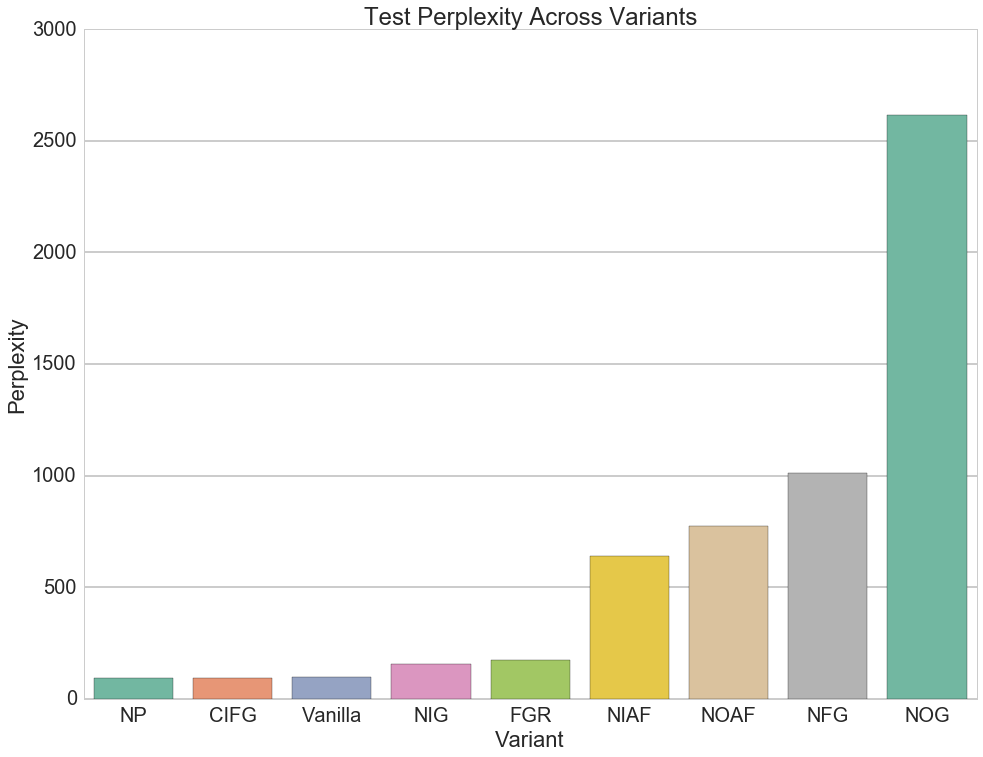

In [5]:
with sns.color_palette("Set2", 9):
    fig = plt.figure(figsize=(16, 12))
    ax = sns.barplot(x='Variant', y='Perplexity', data=results, figure=fig)
    ax.set_ylabel('Perplexity')
    ax.set_title('Test Perplexity Across Variants')

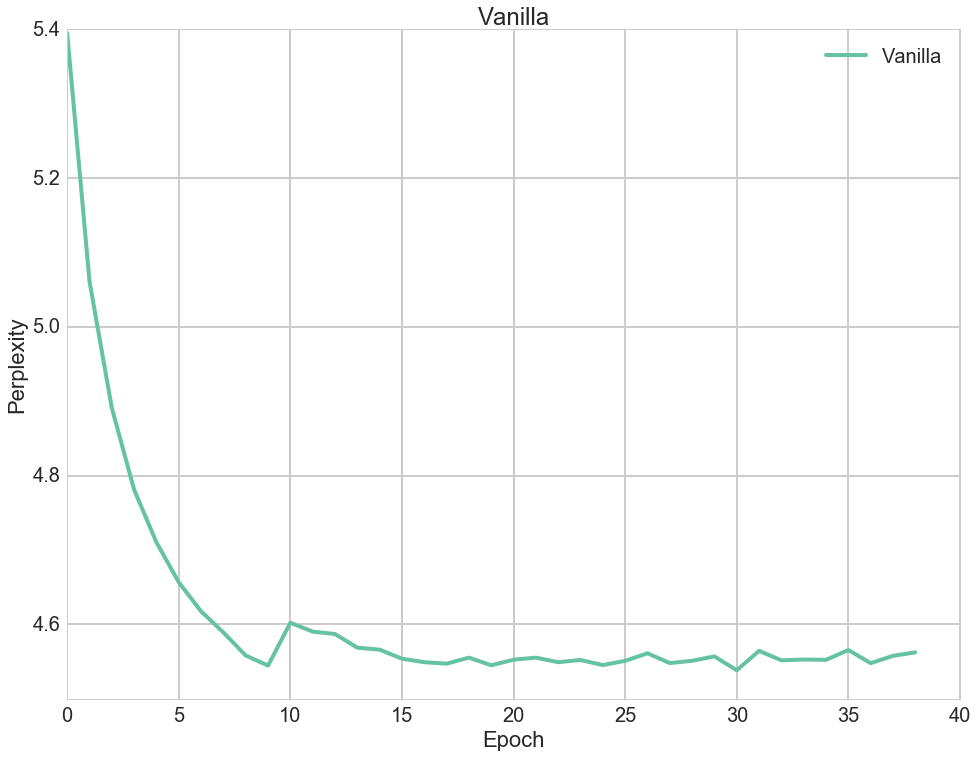

In [6]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)
fig.set_size_inches(16, 12, forward=False)
plot_results(axs, 'results/vanilla.csv', 'Vanilla')
plt.title('Vanilla')
plt.ylabel('Perplexity')
plt.xlabel('Epoch')
plt.legend()

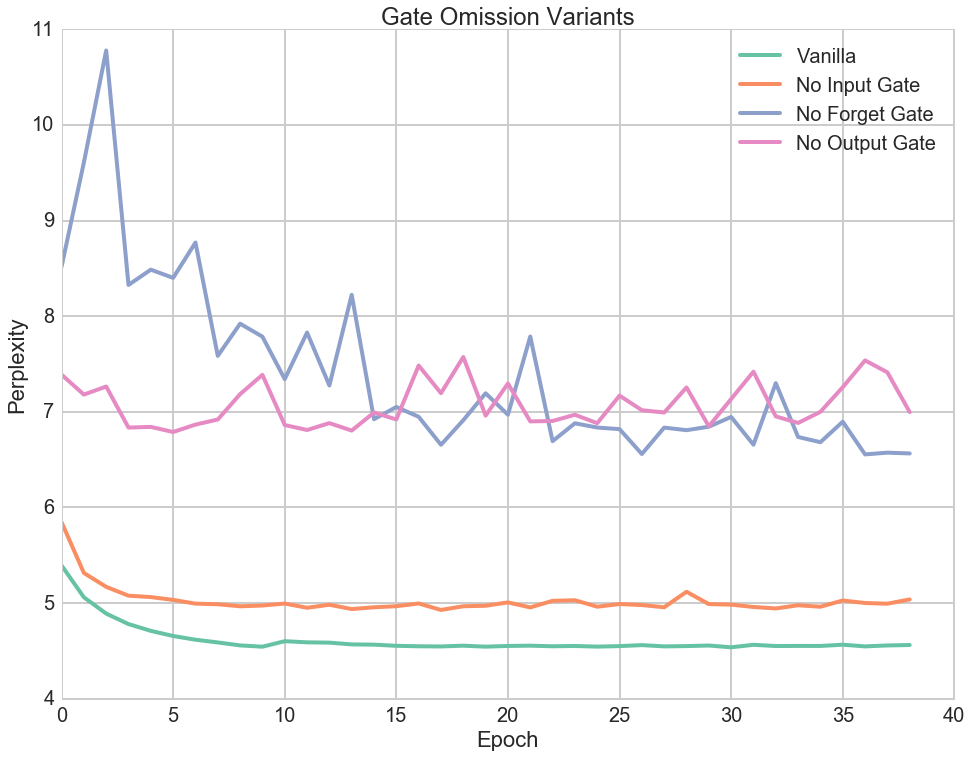

In [7]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)
fig.set_size_inches(16, 12, forward=False)
plot_results(axs, 'results/vanilla.csv', 'Vanilla')
plot_results(axs, 'results/nig.csv', 'No Input Gate')
plot_results(axs, 'results/nfg.csv', 'No Forget Gate')
plot_results(axs, 'results/nog.csv', 'No Output Gate')
plt.title('Gate Omission Variants')
plt.ylabel('Perplexity')
plt.xlabel('Epoch')
plt.legend()

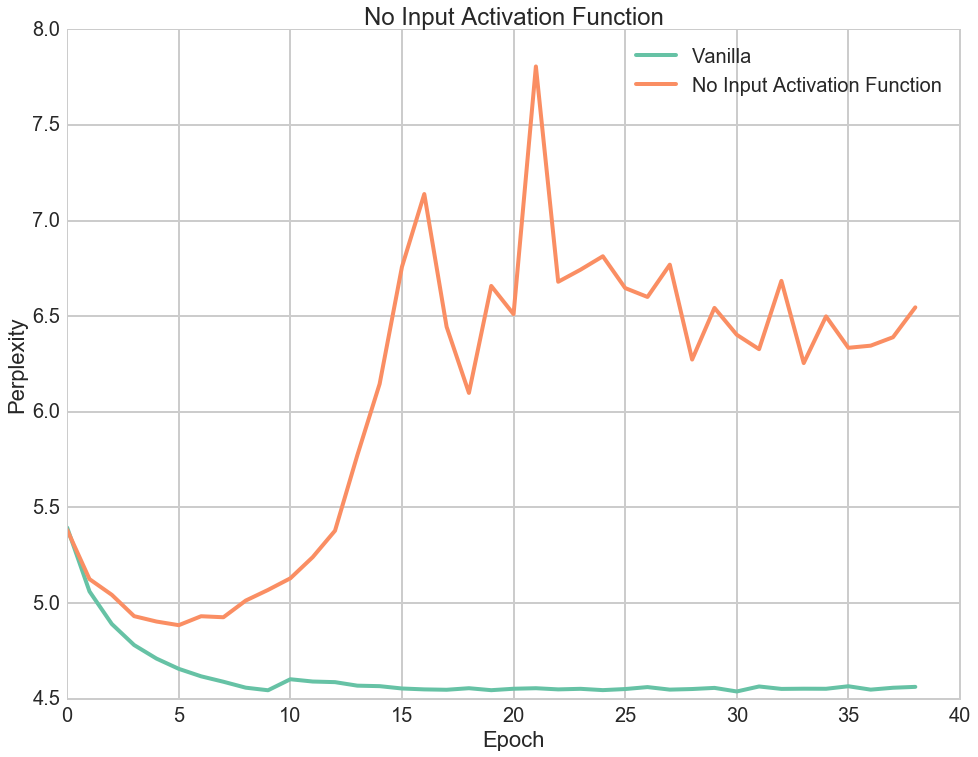

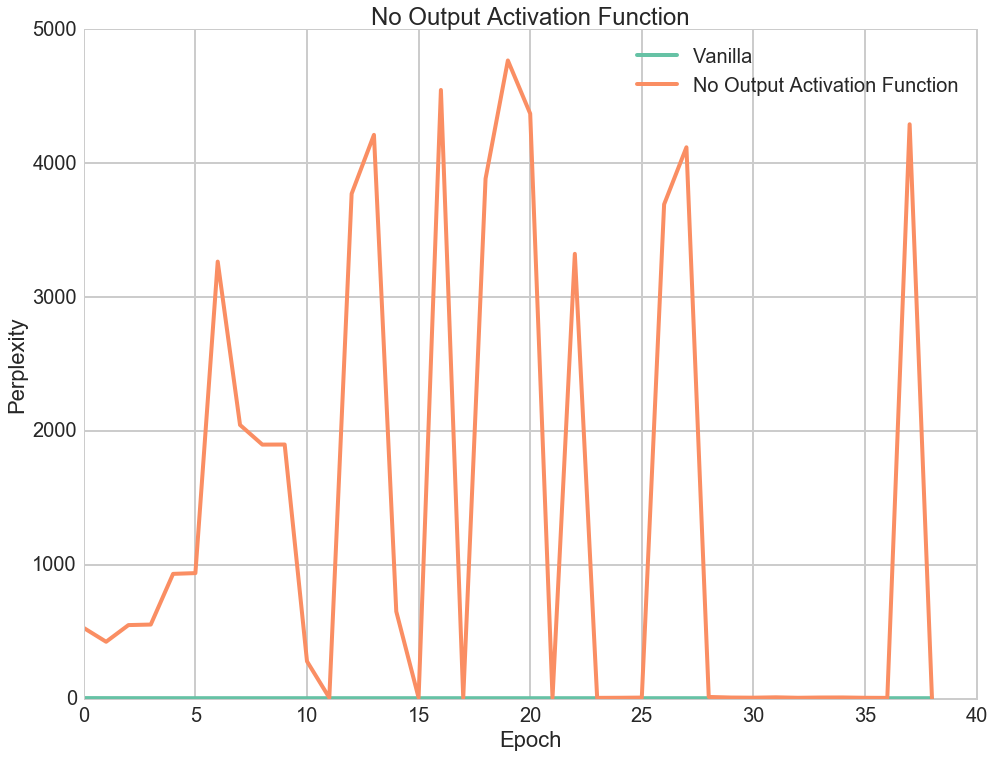

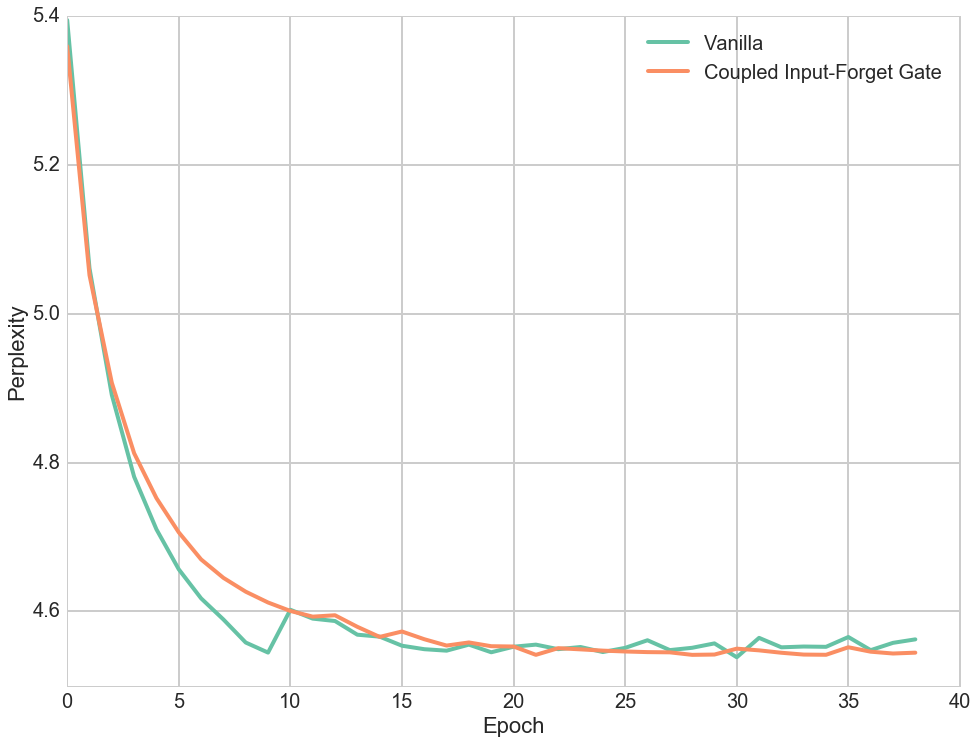

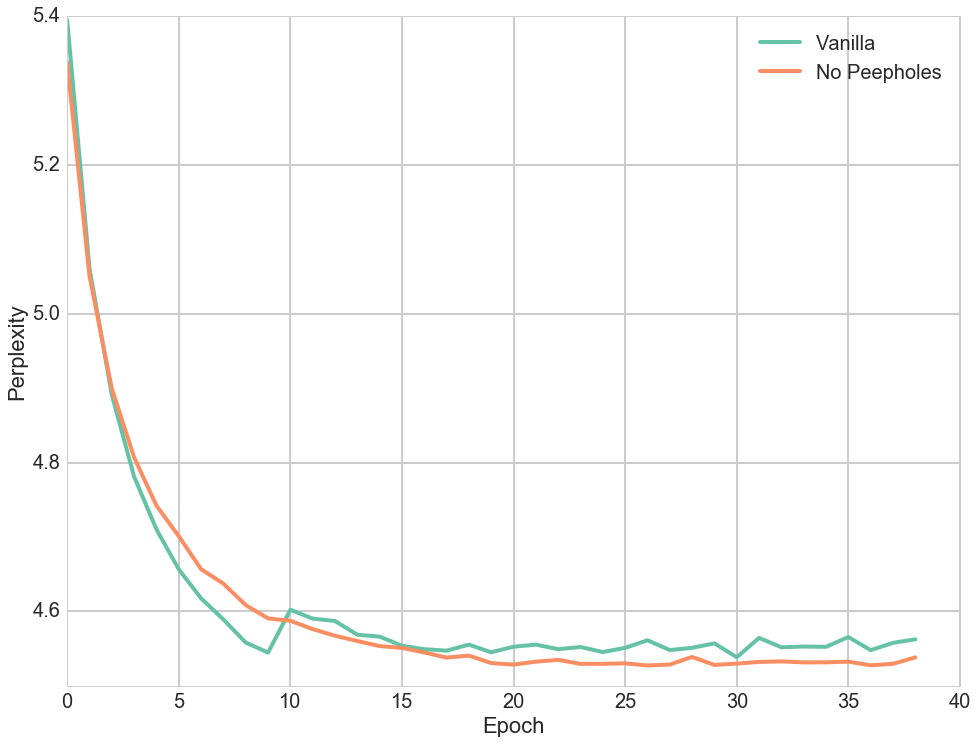

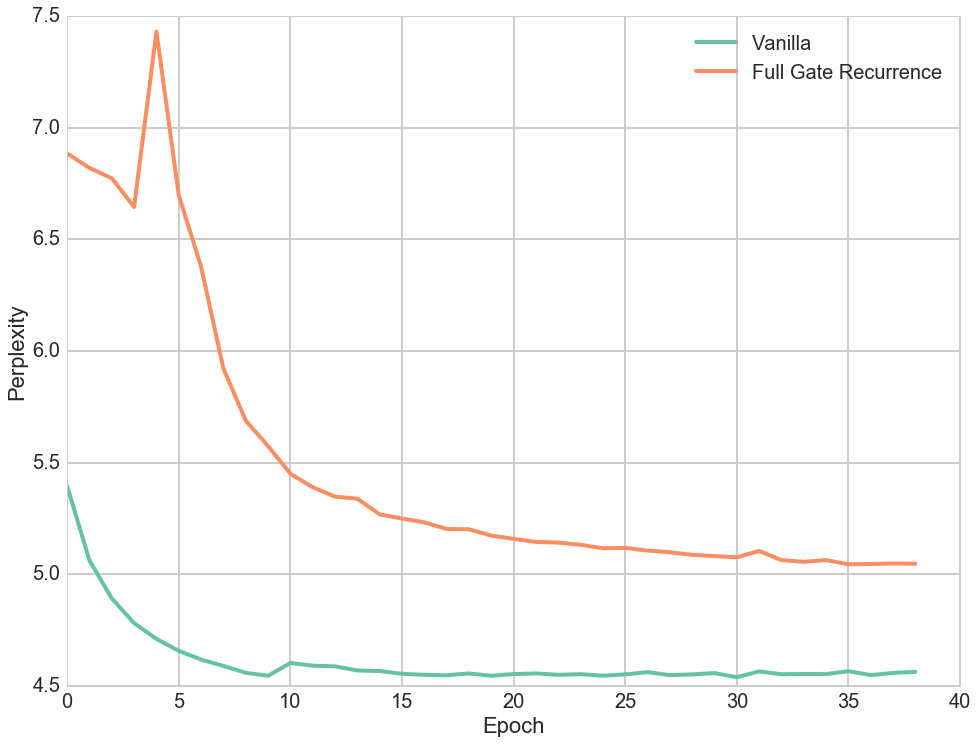

In [8]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)
fig.set_size_inches(16, 12, forward=False)
plot_results(axs, 'results/vanilla.csv', 'Vanilla')
plot_results(axs, 'results/niaf.csv', 'No Input Activation Function')
plt.title('No Input Activation Function')
plt.ylabel('Perplexity')
plt.xlabel('Epoch')
plt.legend()

fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)
fig.set_size_inches(16, 12, forward=False)
plot_results(axs, 'results/vanilla.csv', 'Vanilla')
plot_results(axs, 'results/noaf.csv', 'No Output Activation Function')
plt.title('No Output Activation Function')
plt.ylabel('Perplexity')
plt.xlabel('Epoch')
plt.legend()

fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)
fig.set_size_inches(16, 12, forward=False)
plot_results(axs, 'results/vanilla.csv', 'Vanilla')
plot_results(axs, 'results/cifg.csv', 'Coupled Input-Forget Gate')
plt.ylabel('Perplexity')
plt.xlabel('Epoch')
plt.legend()

fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)
fig.set_size_inches(16, 12, forward=False)
plot_results(axs, 'results/vanilla.csv', 'Vanilla')
plot_results(axs, 'results/np.csv', 'No Peepholes')
plt.ylabel('Perplexity')
plt.xlabel('Epoch')
plt.legend()

fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)
fig.set_size_inches(16, 12, forward=False)
plot_results(axs, 'results/vanilla.csv', 'Vanilla')
plot_results(axs, 'results/fgr.csv', 'Full Gate Recurrence')
plt.ylabel('Perplexity')
plt.xlabel('Epoch')
plt.legend()

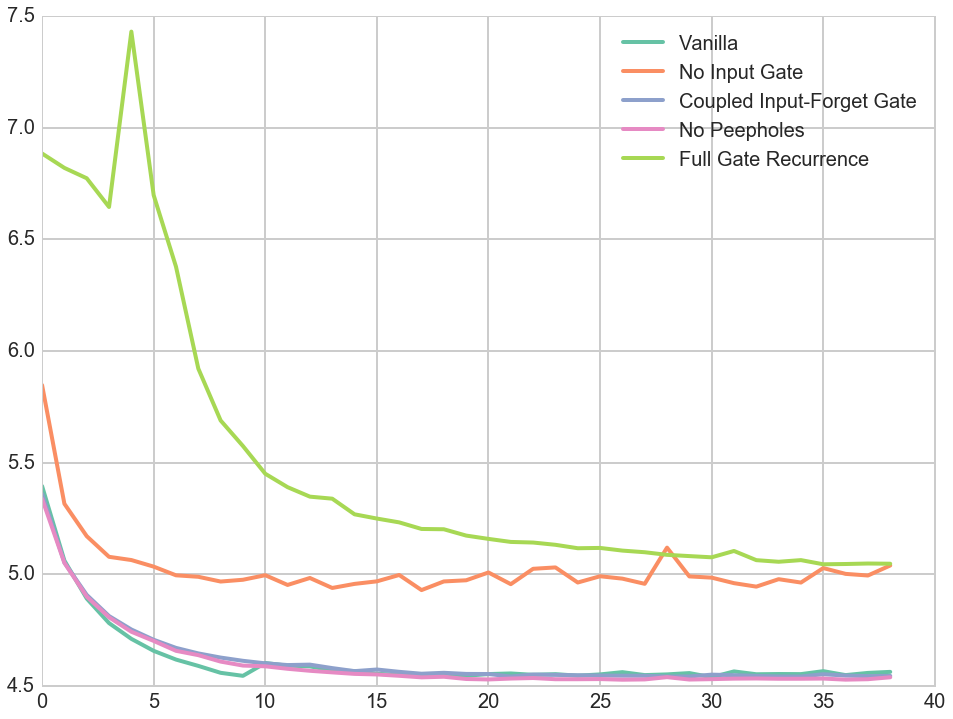

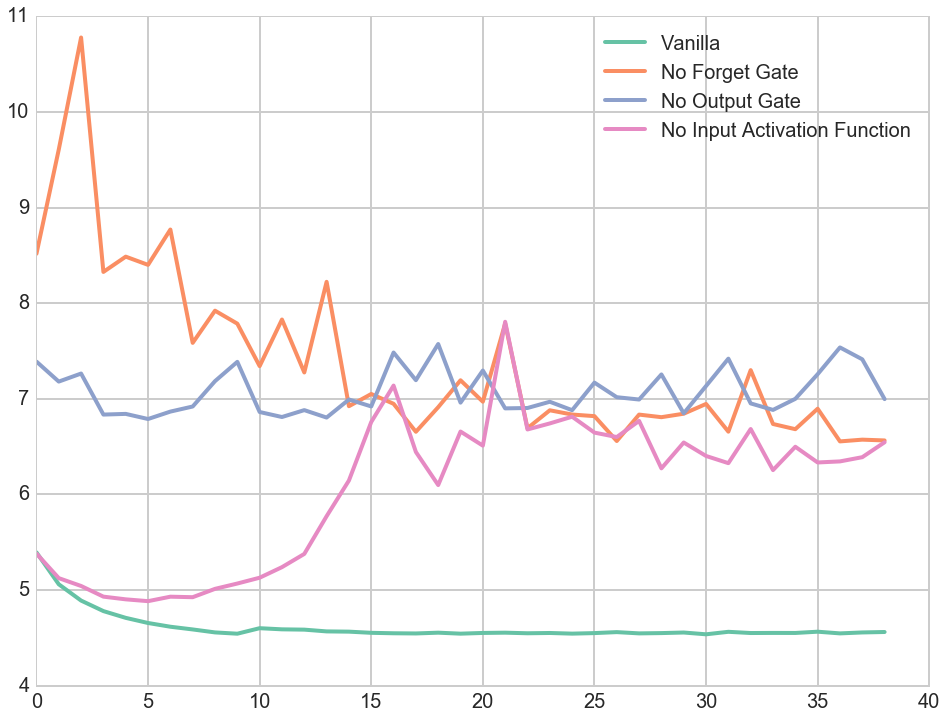

In [9]:
with sns.color_palette("Set2", 8):
    fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)
    fig.set_size_inches(16, 12, forward=False)
    plot_results(axs, 'results/vanilla.csv', 'Vanilla')
    plot_results(axs, 'results/nig.csv', 'No Input Gate')
    plot_results(axs, 'results/cifg.csv', 'Coupled Input-Forget Gate')
    plot_results(axs, 'results/np.csv', 'No Peepholes')
    plot_results(axs, 'results/fgr.csv', 'Full Gate Recurrence')
    plt.legend()
    
    fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)
    fig.set_size_inches(16, 12, forward=False)
    plot_results(axs, 'results/vanilla.csv', 'Vanilla')
    plot_results(axs, 'results/nfg.csv', 'No Forget Gate')
    plot_results(axs, 'results/nog.csv', 'No Output Gate')
    plot_results(axs, 'results/niaf.csv', 'No Input Activation Function')
    plt.legend()